In [14]:
from __future__ import (
    division,
    print_function,
)

import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
from skimage import io,transform

786432
152 17 147 171
46 0 353 326
366 223 93 81
365 345 129 109
364 345 130 109
32 210 207 213
134 348 77 75
255 216 256 295
32 210 207 228
0 210 356 301
42 210 197 213
46 0 353 351
0 0 511 511
111 150 194 198
134 348 75 75
265 216 246 295


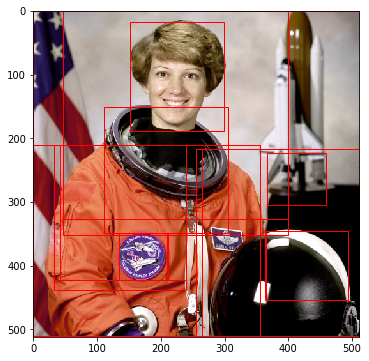

In [3]:
def main_a():
    #载入宇航员图片
    img=skimage.data.astronaut()
    print(img.size)
    #执行选择性搜索
    img_lbl,regions=selectivesearch.selective_search(img,scale=500,sigma=0.9,min_size=10)
#     print('img_lbl:'.format(img_lbl))
#     print('regions:'.format(regions))
    candidates=set()
    #对选择性搜索得到的框进行进一步的筛查
    for r in regions:
        if r['rect'] in candidates:
            continue
        #小于2000像素的不要
        if r['size']<2000:
            continue
        x,y,w,h=r['rect']
        #宽高比不对的不要
        if w/h>1.2 or h/w >1.2:
            continue
        candidates.add(r['rect'])
        
    #draw
    fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(6,6))
    ax.imshow(img)
    
    for x,y,w,h in candidates:
        print(x,y,w,h)
        rect=mpatches.Rectangle(
        (x,y),w,h,fill=False,edgecolor='red',linewidth=1
        )
        ax.add_patch(rect)
    plt.show()
main_a()    

K:\anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
K:\anaconda\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


287 141 181 154
210 41 143 140
44 225 120 101
297 180 118 115
56 116 158 167
279 365 150 146
241 0 199 209
0 0 511 511
190 123 143 133
287 95 181 200
0 318 94 111
0 248 179 208
141 182 106 107
292 141 176 154
0 182 330 329
30 0 92 109
112 201 186 157
50 290 129 151
0 248 314 263
190 149 116 107
166 396 97 97
0 0 82 90
136 223 124 135
0 0 82 92
316 365 113 133
190 149 111 107
44 182 286 258
264 82 124 118
134 0 108 128
112 201 148 157
190 123 116 133
0 0 468 511
141 182 138 129
264 82 124 127
30 0 99 109
30 0 99 116
264 82 124 122
141 182 144 129
0 318 94 106
0 318 94 109
241 0 151 157
292 166 123 129
44 225 120 131
292 180 123 115


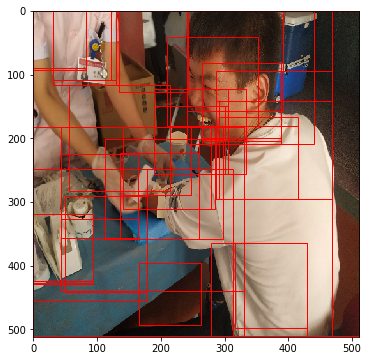

In [22]:

# 载入图片
img=io.imread('K:/qin.jpg')
# img2=skimage.data.astronaut()
img=transform.resize(img,(512,512))

#选择性搜索
img_lbl,regions=selectivesearch.selective_search(img,scale=50,sigma=0.9,min_size=10)
candidates=set()


#对选择性搜索得到的框进行进一步的筛查
for r in regions:
    if r['rect'] in candidates:
        continue
    #小于3000像素的不要
    if r['size']<3000:
        continue
    x,y,w,h=r['rect']
    #宽高比不对的不要
    if w/h>1.2 or h/w >1.2:
        continue
    candidates.add(r['rect'])
    
#draw
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(6,6))
ax.imshow(img)


#绘制框
for x,y,w,h in candidates:
#     print(x,y,w,h)
    rect=mpatches.Rectangle(
    (x,y),w,h,fill=False,edgecolor='red',linewidth=1
    )
    ax.add_patch(rect)
plt.show()
